In [1]:
# importing packages
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# importing dataset
anime=pd.read_csv('/Users/hlind/Downloads/anime.csv')

In [3]:
# viewing data

In [4]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


# Is a Rating Score of 6.2 different from the Mean in this dataset?

<AxesSubplot: >

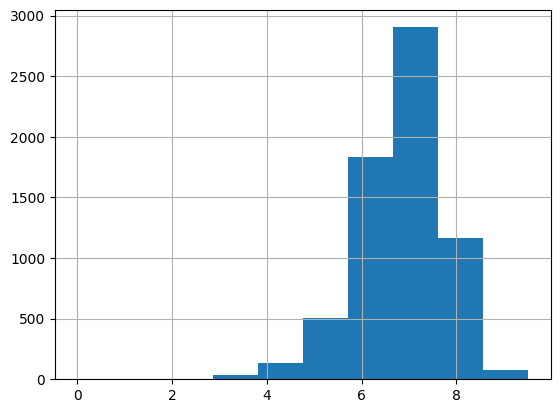

In [5]:
# checking normality - histogram
anime.score.hist()

In [6]:
# checking the mean - score variable
anime.score.mean()

6.848998200359928

In [7]:
# yes, rating score of 6.2 is different from the mean in this dataset

# Does Anime that is still airing differ in popularity from Anime that is no longer airing?

<AxesSubplot: >

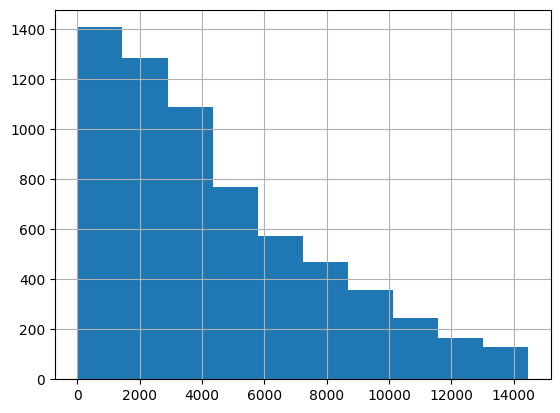

In [8]:
# checking normality - histogram
anime.popularity[anime.status=='Finished Airing'].hist()

In [10]:
# anime shows lose popularity once they finish airing

<AxesSubplot: >

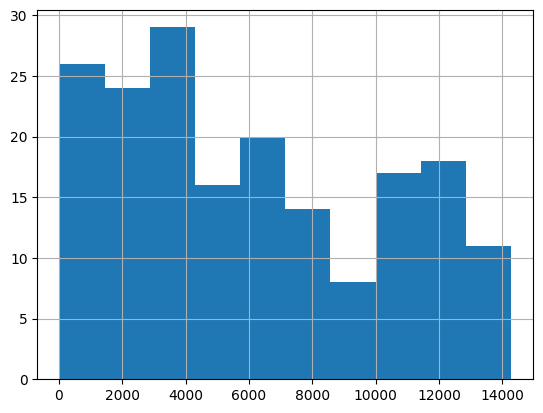

In [11]:
# histogram for currently airing shows
anime.popularity[anime.status=='Currently Airing'].hist()

In [12]:
# popularity varies in currently airing shows

In [13]:
# ttest for comnparison - independent
ttest_ind(anime.popularity[anime.status=='Currently Airing'], anime.popularity[anime.status=='Finished Airing'])

Ttest_indResult(statistic=6.489071311277514, pvalue=9.256789141747445e-11)

In [14]:
# checking the means
anime.popularity[anime.status=='Currently Airing'].mean()

6108.131147540984

In [15]:
anime.popularity[anime.status=='Finished Airing'].mean()

4433.558057054742

In [16]:
# yes, there's a difference between shows that are currently on air v. finished ones with current shows being more popular

# Does the source of the Anime influence the type of Anime?

In [22]:
# recoding to have four levels
animeRecode={'Manga':'Manga', 'Book':'Book', 'Light novel':'Book', '4-koma manga':'Manga', 'Novel':'Book', 'Visual novel':'Book', 'Game':'Game', 'Card game':'Game', 'Web manga':'Manga', 'Music':'Listening', 'Digital manga':'Manga', 'Picture book':'Book', 'Radio':'Listening'}

In [23]:
# replacing with new data
anime2=anime.replace({'source':animeRecode})

In [24]:
# creating crosstab
animeCross=pd.crosstab(anime2['source'], anime['type'])

In [25]:
#viewing crosstab
animeCross

type,Movie,Music,ONA,OVA,Special,TV
source,,,,,,
Book,163,2,62,389,174,584
Game,83,9,39,57,72,210
Listening,2,42,0,1,1,14
Manga,335,12,122,615,393,1328
Original,298,32,163,260,266,770
Other,27,1,22,23,23,74


In [26]:
# chi-square
stats.chi2_contingency(animeCross)

Chi2ContingencyResult(statistic=2185.317247894395, pvalue=0.0, dof=25, expected_freq=array([[1.87101380e+02, 2.01937612e+01, 8.40719856e+01, 2.77149070e+02,
        1.91428614e+02, 6.14055189e+02],
       [6.40011998e+01, 6.90761848e+00, 2.87582484e+01, 9.48035393e+01,
        6.54814037e+01, 2.10047990e+02],
       [8.17036593e+00, 8.81823635e-01, 3.67126575e+00, 1.21025795e+01,
        8.35932813e+00, 2.68146371e+01],
       [3.81964607e+02, 4.12252549e+01, 1.71631674e+02, 5.65795591e+02,
        3.90798590e+02, 1.25358428e+03],
       [2.43613077e+02, 2.62930414e+01, 1.09464907e+02, 3.60858578e+02,
        2.49247301e+02, 7.99523095e+02],
       [2.31493701e+01, 2.49850030e+00, 1.04019196e+01, 3.42906419e+01,
        2.36847630e+01, 7.59748050e+01]]))

In [27]:
# arrays are >5 so the source influences the type

# How do the variables about popularity/ranking relate to each other?

In [28]:
# creating dataset with new variables
animeNew=anime[['score', 'scored_by', 'rank', 'popularity', 'members', 'favorites']]

In [29]:
animeNew.head()

,score,scored_by,rank,popularity,members,favorites
0,7.63,139250,1274.0,231,283882,2809
1,7.89,91206,727.0,366,204003,2579
2,7.55,37129,1508.0,1173,70127,802
3,8.21,36501,307.0,916,93312,3344
4,8.67,107767,50.0,426,182765,2082


In [30]:
# pearson correlation with new dataset
animeNew.corr(method='pearson')

,score,scored_by,rank,popularity,members,favorites
score,1.000000,0.381926,-0.898747,-0.688492,0.415626,0.256094
scored_by,0.381926,1.000000,-0.356686,-0.425719,0.987107,0.793949
rank,-0.898747,-0.356686,1.000000,0.777302,-0.391524,-0.208503
popularity,-0.688492,-0.425719,0.777302,1.000000,-0.474798,-0.210745
members,0.415626,0.987107,-0.391524,-0.474798,1.000000,0.781565
favorites,0.256094,0.793949,-0.208503,-0.210745,0.781565,1.000000


In [31]:
# adding color
animeNew.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,score,scored_by,rank,popularity,members,favorites
score,1.0,0.38,-0.9,-0.69,0.42,0.26
scored_by,0.38,1.0,-0.36,-0.43,0.99,0.79
rank,-0.9,-0.36,1.0,0.78,-0.39,-0.21
popularity,-0.69,-0.43,0.78,1.0,-0.47,-0.21
members,0.42,0.99,-0.39,-0.47,1.0,0.78
favorites,0.26,0.79,-0.21,-0.21,0.78,1.0


In [32]:
# surprisingly, favorites and members do not correlate
# popularity and score correlate positively
# as expected, members and popularity correlate well